In [1]:
import pandas as pd
import numpy as np


data = pd.read_csv("/home/vinchhi/Documents/ieorclassproject7/EUR_USD_Week1.csv", header = 0)

In [2]:
data.head()

,lTid,cDealable,CurrencyPair,RateDateTime,RateBid,RateAsk
0,6888383605,D,EUR/USD,2018-09-02 17:00:08.910000000,1.15950,1.15980
1,6888383648,D,EUR/USD,2018-09-02 17:00:51.910000000,1.15951,1.15980
2,6888383651,D,EUR/USD,2018-09-02 17:00:52.160000000,1.15951,1.16000
3,6888383682,D,EUR/USD,2018-09-02 17:01:03.410000000,1.15951,1.15991
4,6888383689,D,EUR/USD,2018-09-02 17:01:04.160000000,1.15951,1.15990


In [3]:
x = data.iloc[:,3]

I will now convert this non UTC time to epoch time, like in the project.

In [4]:
from datetime import datetime 
from calendar import timegm
import time

In [5]:
time_series = []
epoch_times = []

for m in x:
    i = m[:19]
    i.rstrip()
    i.lstrip()
    myTime = datetime.strptime(i, "%Y-%m-%d %H:%M:%S")
    epoch_times.append(timegm(myTime.timetuple()))


Generating a series of ticks for the strategy 

In [6]:
b = data.iloc[:,4]
a = data.iloc[:,5]

bids = []
bids = b
asks = []
asks = a
prices = []
for i in range(len(bids)):
    prices.append(bids[i])
    prices.append(asks[i])

for i in range(len(prices)):
    prices[i] = (float)('%.5f'%(prices[i]))



Appending epoch times for each bid and ask price. 

In [7]:
epochs = []
for i in range(len(epoch_times)):
    epochs.append((int)(epoch_times[i]))
    epochs.append((int)(epoch_times[i]))

Calculating the 5 minute moving average and 20 minute moving average. Also generating respective trade signals when it these two curves cross each other. 

In [8]:
from collections import deque
q5 = deque()
q20 = deque()
e5 = deque()
e20 = deque()
total5 = 0
total20 = 0
pnl = 0
MA5 = []
MA20 = []
buy = True
sell = True
for i in range(100):
    #queue is empty case
    if(len(q5) == 0):
        q5.append(prices[i])
        e5.append(epochs[i])
        total5 += prices[i]
    #Check if the window is greater than 5 minutes
    else:
        if(epochs[i] - e5[0] > 300):
            total5 -= q5[0]
            q5.popleft()
            e5.popleft()
        q5.append(prices[i])
        e5.append(epochs[i])
        total5 += prices[i]
    #Queue is empty case
    if(len(q20) == 0):
        q20.append(prices[i])
        e20.append(epochs[i])
        total20 += prices[i]
    #Check if the window is greater than 20 minutes
    else:
        if(epochs[i] - e20[0] > 1200):
            total20 -= q20[0]
            q20.popleft()
            e20.popleft()
        q20.append(prices[i])
        e20.append(epochs[i])
        total20 += prices[i]
    MA5.append(total5/len(q5))
    MA20.append(total20/len(q20))
    if(total20/len(q20) <  total5/len(q5)):
        if(i % 2 == 0 and buy):
            pnl -= ((prices[i] * 100000))
            print("Bought at time: "+str(epochs[i])+"\t"+"PNL at this time is: "+str(pnl)+"\n")
            buy = False
            sell = True
    if(total20/len(q20) >  total5/len(q5)):
        if(i % 2 == 1 and sell):
            pnl += ((prices[i] * 100000))
            print("Sold at time: "+str(epochs[i])+"\t"+"PNL at this time is: "+str(pnl)+"\n")
            buy = True
            sell = False
print("Profit from strategy: " + str(round(pnl)))

Bought at time: 1535907983	PNL at this time is: -115950.0

Sold at time: 1535908124	PNL at this time is: 30.0

Bought at time: 1535908127	PNL at this time is: -115922.00000000001

Sold at time: 1535908127	PNL at this time is: 57.99999999998545

Bought at time: 1535908158	PNL at this time is: -115933.00000000001

Sold at time: 1535908684	PNL at this time is: 25.999999999970896

Profit from strategy: 26


The value of PNL obtained above is exactly the same as the strategy implemented in the project. Furthermore, as expected the timings of the trade signals also match.

Now I shall plot the 5 minute moving average and the 20 minute moving average with time on X axis depicting when the two curves cross each other. 

In [9]:
import matplotlib.pyplot as plt

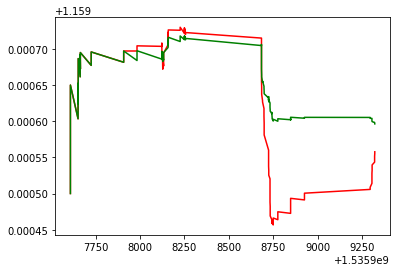

In [10]:
plt.plot(epochs[:100],MA5,'r') #5 minute moving averages
plt.plot(epochs[:100],MA20,'g') #20 minute moving averages
plt.show()

Where the curves cross, a signal to trade is generated.